## Comparison of Jes Ford and Tom McClintock WL codes 

In [5]:
#!/bin/env python
#==========================
# author: Maria Elidaiana
# email: mariaeli@brandeis.edu
#==========================

from __future__ import division
from astropy.cosmology import FlatLambdaCDM  
import numpy as np
import matplotlib.pyplot as plt
from time import clock

#Tom McClintock code: NFW, Einasto, misc, boost-factor, correlation function and bias
import clusterwl

#Jes Ford code: NFW, misc, mc-relation and mass-richness convertions
import clusterlensing
from clusterlensing import ClusterEnsemble
%matplotlib inline

In [2]:
#Tom's result: I guess for a choice of one halo mass=1e14 Msun/h, lambda-CDM, om=0.3, z=0.0
#Obs: Rp in units of Mpc/h and Sigma_nfw in units of hMsun/pc^2
h=0.7 # need this info to convert Tom's units to Ford's units

initial=clock()
NR = 1000
R = np.logspace(-2, 3, NR, base=10) #3D distance, Mpc/h comoving
Mass = 1e14 #Msun/h
conc = 5.423632 #set concentration to be equal to Ford's computed concentration
Omega_m = 0.3
Rp = np.logspace(-2, 2.4, NR, base=10)
Sigma_nfw = clusterwl.deltasigma.Sigma_nfw_at_R(Rp, Mass, conc, Omega_m)
DeltaSigma_nfw = clusterwl.deltasigma.DeltaSigma_at_R(Rp, Rp, Sigma_nfw, Mass, conc, Omega_m)
#Adding miscentering
Rmis = 0.25 #Mpc/h
Sigma_mis  = clusterwl.miscentering.Sigma_mis_at_R(Rp, Rp, Sigma_nfw, Mass, conc, Omega_m, Rmis)
DeltaSigma_mis = clusterwl.miscentering.DeltaSigma_mis_at_R(Rp, Rp, Sigma_mis)

final=clock()
print 'Tom time:', final-initial, 'seconds'

Tom time: 1.842895 seconds


In [3]:
# Ford's result: for the same halo
initial=clock()
m200 = [Mass*h]
z    = [0.0]
cluster = ClusterEnsemble(z, cosmology=FlatLambdaCDM(H0=70, Om0=0.3))
cluster.m200 = m200
print cluster.dataframe.head()
cluster.calc_nfw(Rp*h) #for the same radial bins as Tom
Sigma_nfw_ford = cluster.sigma_nfw.value[0] #
DeltaSigma_nfw_ford = cluster.deltasigma_nfw.value[0]

#Adding misc
cluster.calc_nfw(Rp*h, offsets=[Rmis*h])
Sigma_mis_ford = cluster.sigma_nfw.value[0]
DeltaSigma_mis_ford = cluster.deltasigma_nfw.value[0]

final=clock()
print 'Ford time:', final-initial, 'seconds'

     z          m200       n200      r200      c200       delta_c        rs
0  0.0  7.000000e+13  39.496124  0.850135  5.423632  10472.044538  0.156746
Ford time: 141.309734 seconds


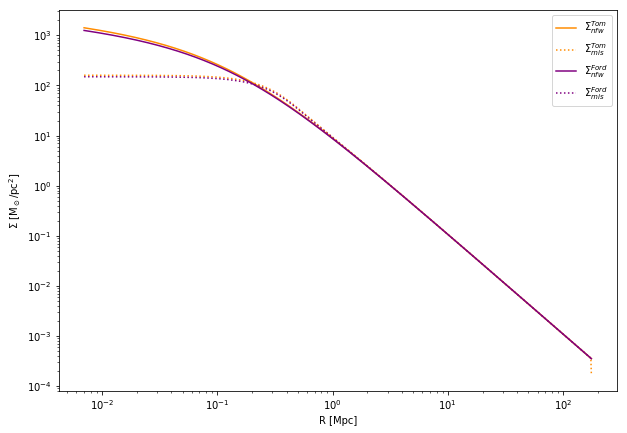

In [8]:
#Plotting results
plt.figure(1, figsize=(10,7))
plt.loglog(Rp*h, Sigma_nfw/h, ls="-", c="darkorange", label=r"$\Sigma_{nfw}^{Tom}$")
plt.loglog(Rp*h, Sigma_mis/h, c="darkorange",ls=":", label=r"$\Sigma_{mis}^{Tom}$")
plt.loglog(Rp*h, Sigma_nfw_ford, ls="-", c="purple", label=r"$\Sigma_{nfw}^{Ford}$")
plt.loglog(Rp*h, Sigma_mis_ford, c="purple",ls=":", label=r"$\Sigma_{mis}^{Ford}$")

plt.ylabel(r"$\Sigma$ [M$_\odot$/pc$^2$]")
plt.xlabel(r"R [Mpc]")
plt.legend(loc = 0)

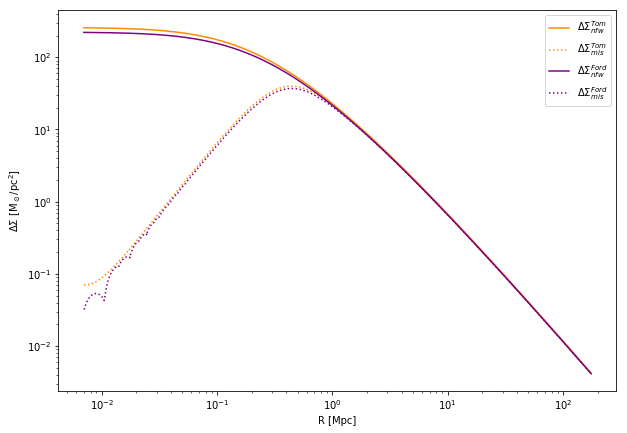

In [9]:
plt.figure(2, figsize=(10,7))
plt.loglog(Rp*h, DeltaSigma_nfw/h, ls="-", c="darkorange", label=r"$\Delta\Sigma_{nfw}^{Tom}$")
plt.loglog(Rp*h, DeltaSigma_mis/h, ls=":", c="darkorange", label=r"$\Delta\Sigma_{mis}^{Tom}$")
plt.loglog(Rp*h, DeltaSigma_nfw_ford, ls="-", c="purple", label=r"$\Delta\Sigma_{nfw}^{Ford}$")
plt.loglog(Rp*h, DeltaSigma_mis_ford, ls=":", c="purple", label=r"$\Delta\Sigma_{mis}^{Ford}$")
plt.ylabel(r"$\Delta\Sigma$ [M$_\odot$/pc$^2$]")
plt.xlabel(r"R [Mpc]")
plt.legend(loc = 0)